## **CNN with MNIST Data**

https://setosa.io/#/

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [5]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[8].shape

(28, 28)

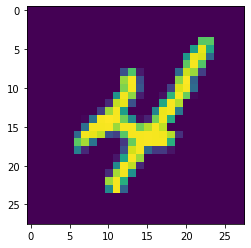

In [7]:
plt.imshow(X_train[9])
# plt.matshow(X_train[5])

In [8]:
y_train[9]

4

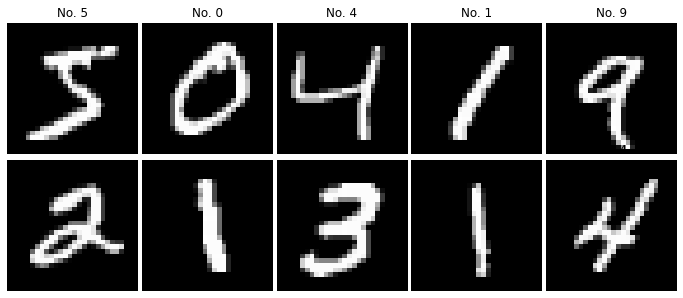

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [10]:
X_train[9].min()

0

In [11]:
X_train[9].max()

255

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
X_train[9].min()

0.0

In [14]:
X_train[9].max()

1.0

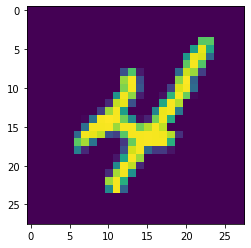

In [15]:
plt.imshow(X_train[9])

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1559 - accuracy: 0.9538 - val_loss: 0.0588 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0498 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0398 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0439 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0477 - val_accuracy: 0.9853


In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.history.history

{'loss': [0.15592949092388153,
  0.05175334960222244,
  0.03247121348977089,
  0.021761231124401093,
  0.015024992637336254],
 'accuracy': [0.9537833333015442,
  0.9841499924659729,
  0.9902166724205017,
  0.9929999709129333,
  0.9952499866485596],
 'val_loss': [0.058756809681653976,
  0.04977622628211975,
  0.03975524753332138,
  0.04386160150170326,
  0.047654230147600174],
 'val_accuracy': [0.98089998960495,
  0.9830999970436096,
  0.9865999817848206,
  0.9860000014305115,
  0.9853000044822693]}

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.155929,0.953783,0.058757,0.9809
1,0.051753,0.984150,0.049776,0.9831
2,0.032471,0.990217,0.039755,0.9866
3,0.021761,0.993000,0.043862,0.9860
4,0.015025,0.995250,0.047654,0.9853


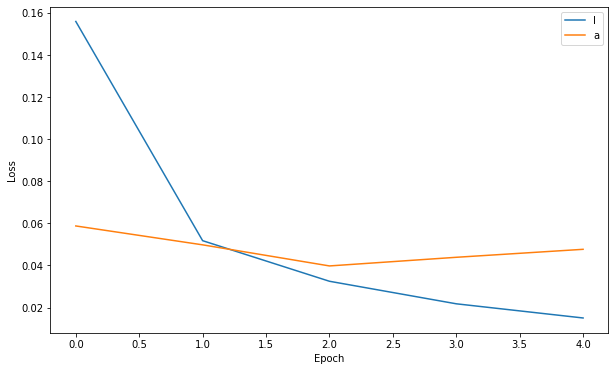

In [30]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

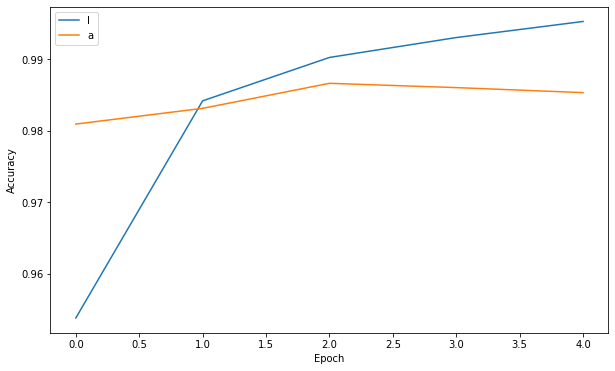

In [31]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [32]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 5ms/step - loss: 0.0477 - accuracy: 0.9853
[0.047654230147600174, 0.9853000044822693]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
preds = model.predict(X_test)
preds

array([[6.0043368e-12, 7.0317918e-11, 1.3654292e-10, ..., 1.0000000e+00,
        3.8990138e-11, 8.1457374e-10],
       [3.6317878e-09, 4.2918637e-07, 9.9999952e-01, ..., 2.1404087e-12,
        5.3711233e-12, 9.8806044e-13],
       [4.4659723e-07, 9.9927169e-01, 1.8834139e-06, ..., 7.1889150e-04,
        2.8513709e-06, 1.2100743e-07],
       ...,
       [6.8738100e-16, 4.1470972e-12, 1.5058845e-14, ..., 6.8930261e-10,
        1.2865397e-09, 2.0621023e-08],
       [3.1552395e-12, 2.3609415e-14, 8.5237002e-15, ..., 3.9144168e-10,
        2.1066051e-06, 2.1678562e-11],
       [2.6439814e-12, 7.7302978e-14, 2.8620389e-12, ..., 3.2748843e-16,
        5.6501093e-10, 1.8871197e-15]], dtype=float32)

In [35]:
preds[0]

array([6.0043368e-12, 7.0317918e-11, 1.3654292e-10, 4.7564468e-09,
       3.5900612e-12, 1.2127271e-10, 3.5490831e-15, 1.0000000e+00,
       3.8990138e-11, 8.1457374e-10], dtype=float32)

In [36]:
predictions= np.argmax(preds, axis=1)

In [37]:
len(predictions)

10000

In [38]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
print(confusion_matrix(y_test, predictions))

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1120    1    6    1    0    1    4    2    0]
 [   1    0 1014    0    1    0    0   13    3    0]
 [   0    0    2 1003    0    3    0    1    1    0]
 [   0    0    0    0  977    0    0    0    0    5]
 [   2    0    0   18    0  864    5    0    3    0]
 [   8    3    1    2    4    7  931    0    2    0]
 [   1    0    2    0    0    0    0 1024    0    1]
 [   3    0    1    1    3    2    1    3  957    3]
 [   2    0    0    3    5    2    0    9    2  986]]


In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.047654230147600174
Test accuracy: 0.9853000044822693


In [42]:
my_number = X_test[5]

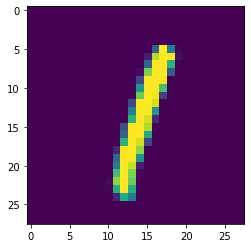

In [43]:
plt.imshow(my_number.reshape(28,28));

In [44]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.6688067e-08, 9.9925953e-01, 6.4668356e-08, 9.5149011e-10,
        6.8677832e-07, 4.8867516e-08, 6.5520274e-09, 7.3864119e-04,
        7.9442111e-07, 1.1973371e-07]], dtype=float32)

In [45]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [46]:
model.save("cnn-1.h5")